### Insight into the Dataset

#### The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task. Other measurements, which are easier to obtain, are used to predict the age.The attribute name, attribute type, the measurement unit and a brief description. The number of rings is the value to predict. 

#### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

#### Importing Dataset

In [2]:
df = pd.read_csv("abalone.csv")
df.head(5)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


#### Age = Rings + 1.5, lets update the column Rings as Age

In [3]:
df["Age"] = df["Rings"]+1.5
df.drop("Rings",axis = 1,inplace=True)
df.head(3)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.15,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.07,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.21,10.5


#### Checking for null values

In [4]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Age               0
dtype: int64

#### Dataset have no null values

#### Checking the datatype of columns

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Age             4177 non-null   float64
dtypes: float64(8), object(1)
memory usage: 293.8+ KB


In [6]:
df.shape

(4177, 9)

#### Dataset have 4177 rows and 9 columns

### EDA

#### Lets find out the relationship between features and target variable 'Rings'

<AxesSubplot:xlabel='Sex', ylabel='Age'>

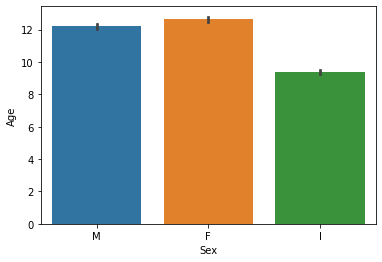

In [7]:
sns.barplot(x=df['Sex'],y=df['Age'])     

#### Females have more Life expectancy than males

<AxesSubplot:xlabel='Length', ylabel='Age'>

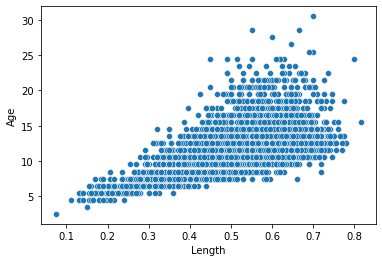

In [8]:
sns.scatterplot(x=df['Length'],y=df['Age'])     

#### As the length increases there is a possibility of increased life span

<AxesSubplot:xlabel='Diameter', ylabel='Age'>

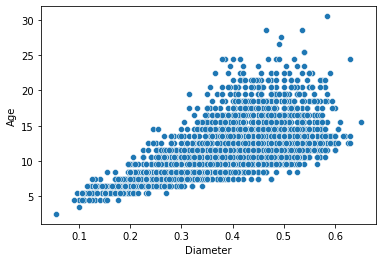

In [9]:
sns.scatterplot(x=df['Diameter'],y=df['Age'])     

<AxesSubplot:xlabel='Height', ylabel='Age'>

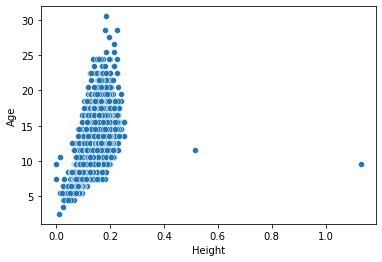

In [10]:
sns.scatterplot(x=df['Height'],y=df['Age'])     

#### Height doesnt have much impact on age

<AxesSubplot:xlabel='Whole weight', ylabel='Age'>

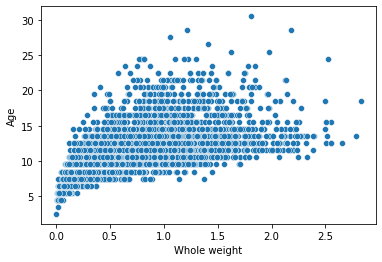

In [11]:
sns.scatterplot(x=df['Whole weight'],y=df['Age'])     

#### Whole weight doesn't have a remarkable contibution for the life span

<AxesSubplot:xlabel='Shucked weight', ylabel='Age'>

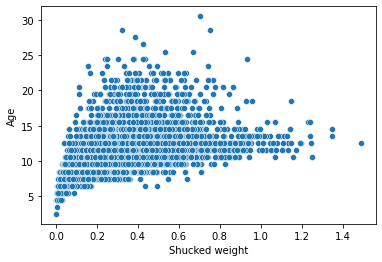

In [12]:
sns.scatterplot(x=df['Shucked weight'],y=df['Age'])     

<AxesSubplot:xlabel='Viscera weight', ylabel='Age'>

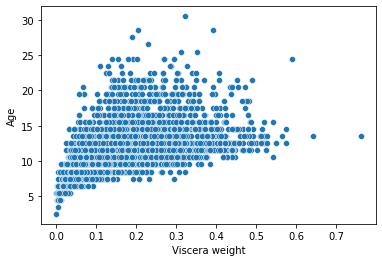

In [13]:
sns.scatterplot(x=df['Viscera weight'],y=df['Age'])     

<AxesSubplot:xlabel='Shell weight', ylabel='Age'>

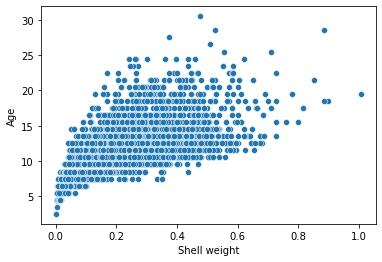

In [14]:
sns.scatterplot(x=df['Shell weight'],y=df['Age'])    

#### Whole weight,Shucked weight,Viscera weight and shell weight is having almost same trend

#### "Sex" is object Dtype, lets convert that into numerical

In [15]:
from sklearn.preprocessing import LabelEncoder
label_enc = LabelEncoder()
df['Sex'] = label_enc.fit_transform(df['Sex'])
df.head(3)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.15,16.5
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.07,8.5
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.21,10.5


In [16]:
df['Sex'].value_counts()

2    1528
1    1342
0    1307
Name: Sex, dtype: int64

#### Checking the correlation

In [17]:
df.corr()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
Sex,1.000000,-0.036066,-0.038874,-0.042077,-0.021391,-0.001373,-0.032067,-0.034854,-0.034627
Length,-0.036066,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,-0.038874,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,-0.042077,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,-0.021391,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,-0.001373,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,-0.032067,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,-0.034854,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Age,-0.034627,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


#### Length and diameter are highly correlated, diameter is slighly more correlated with Age as compared to length.
#### Shell weight have the highest correlation with Age and Sex doesn't have much correlation

#### The feature variables are highly correlated, lets see it visually

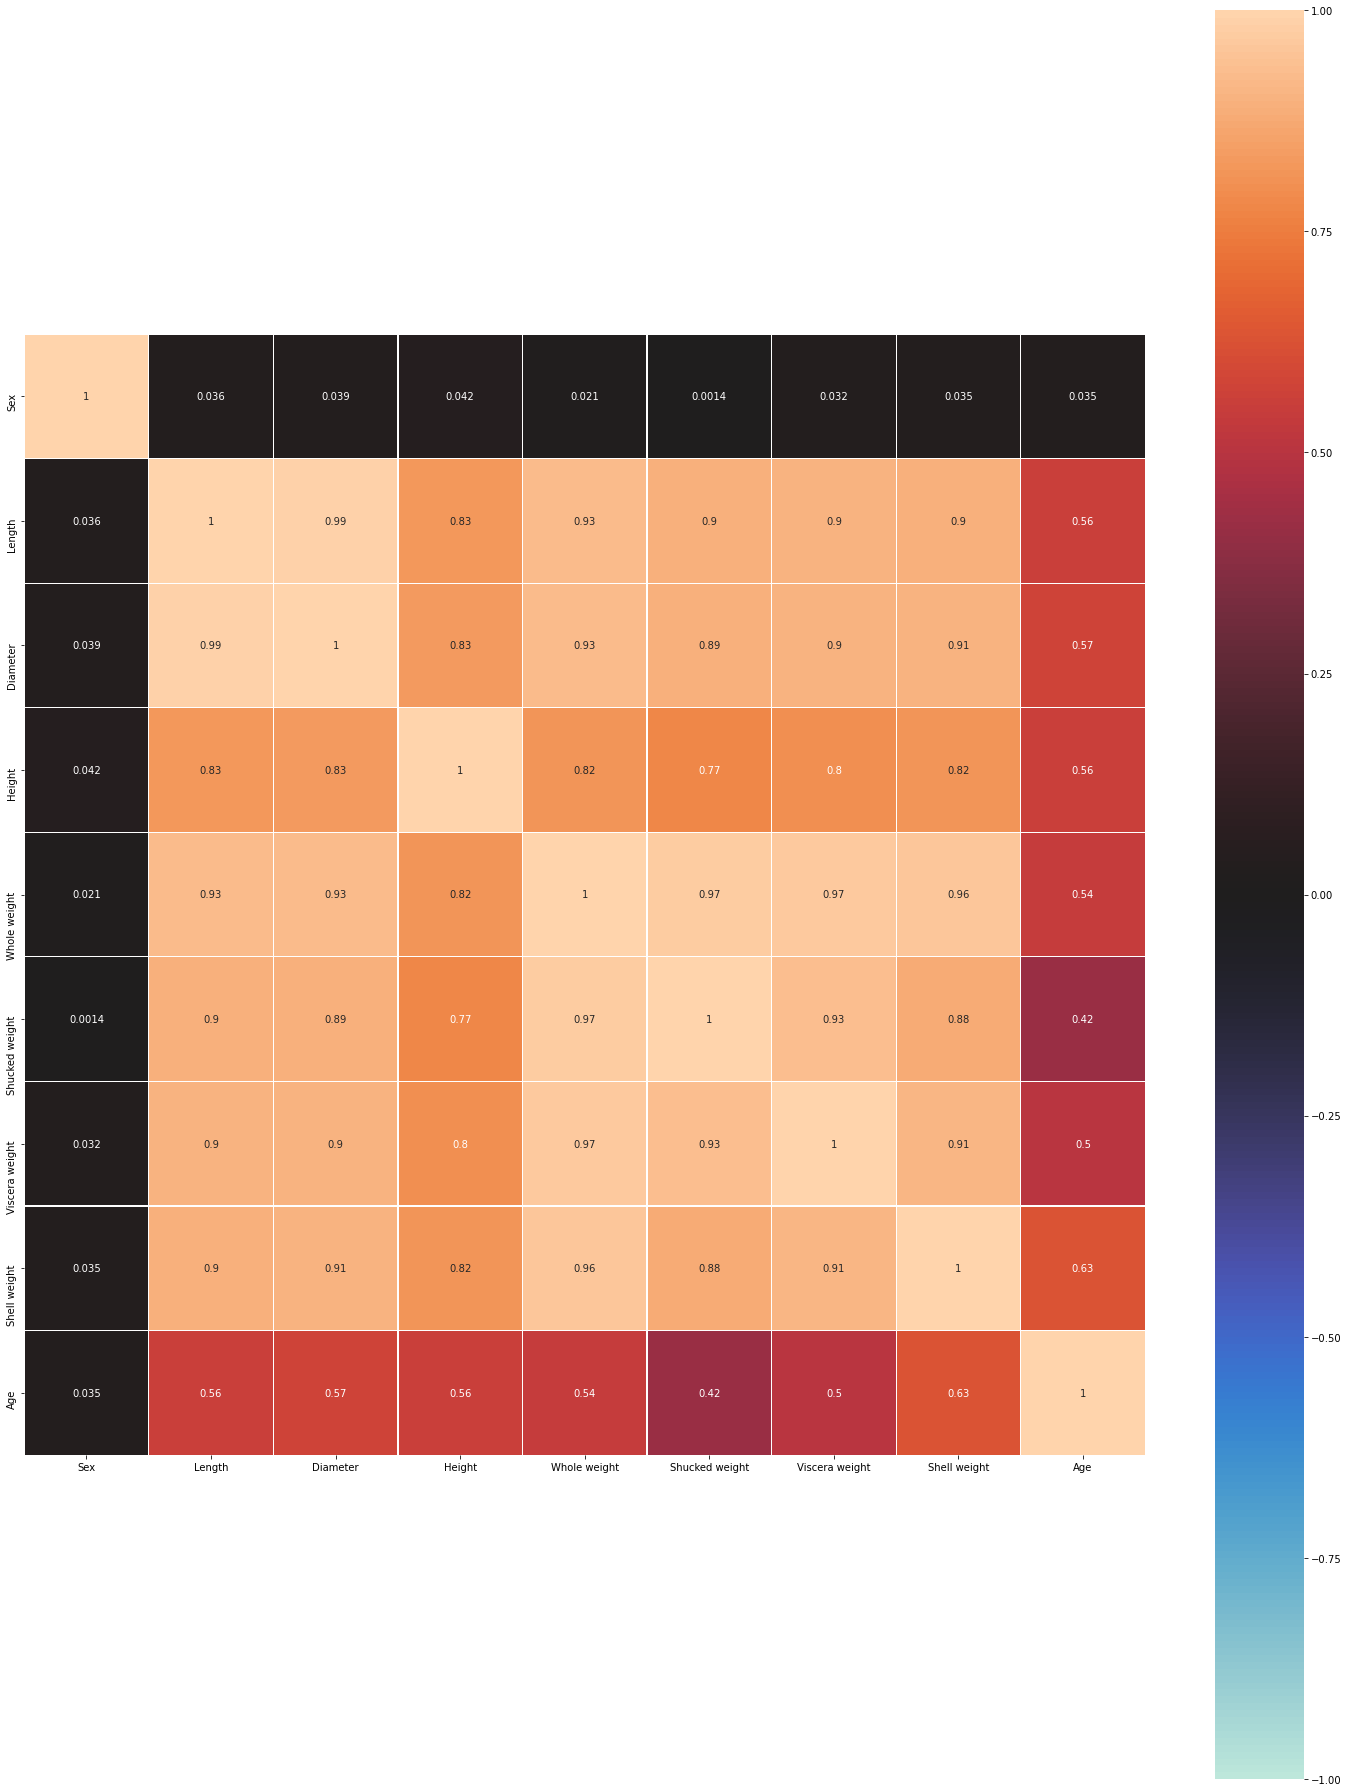

In [18]:
df_corr = df.corr().abs()
plt.figure(figsize=(20,25))
sns.heatmap(df_corr,vmin=-1,vmax=1,annot=True,square = True,center=0,fmt='.2g',linewidth=.2)
plt.tight_layout()

In [19]:
df.describe()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,1.052909,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,11.433684
std,0.822240,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,2.500000
25%,0.000000,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,9.500000
50%,1.000000,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,10.500000
75%,2.000000,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,12.500000
max,2.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,30.500000


#### Before doing the feature selection, lets check for the outliers

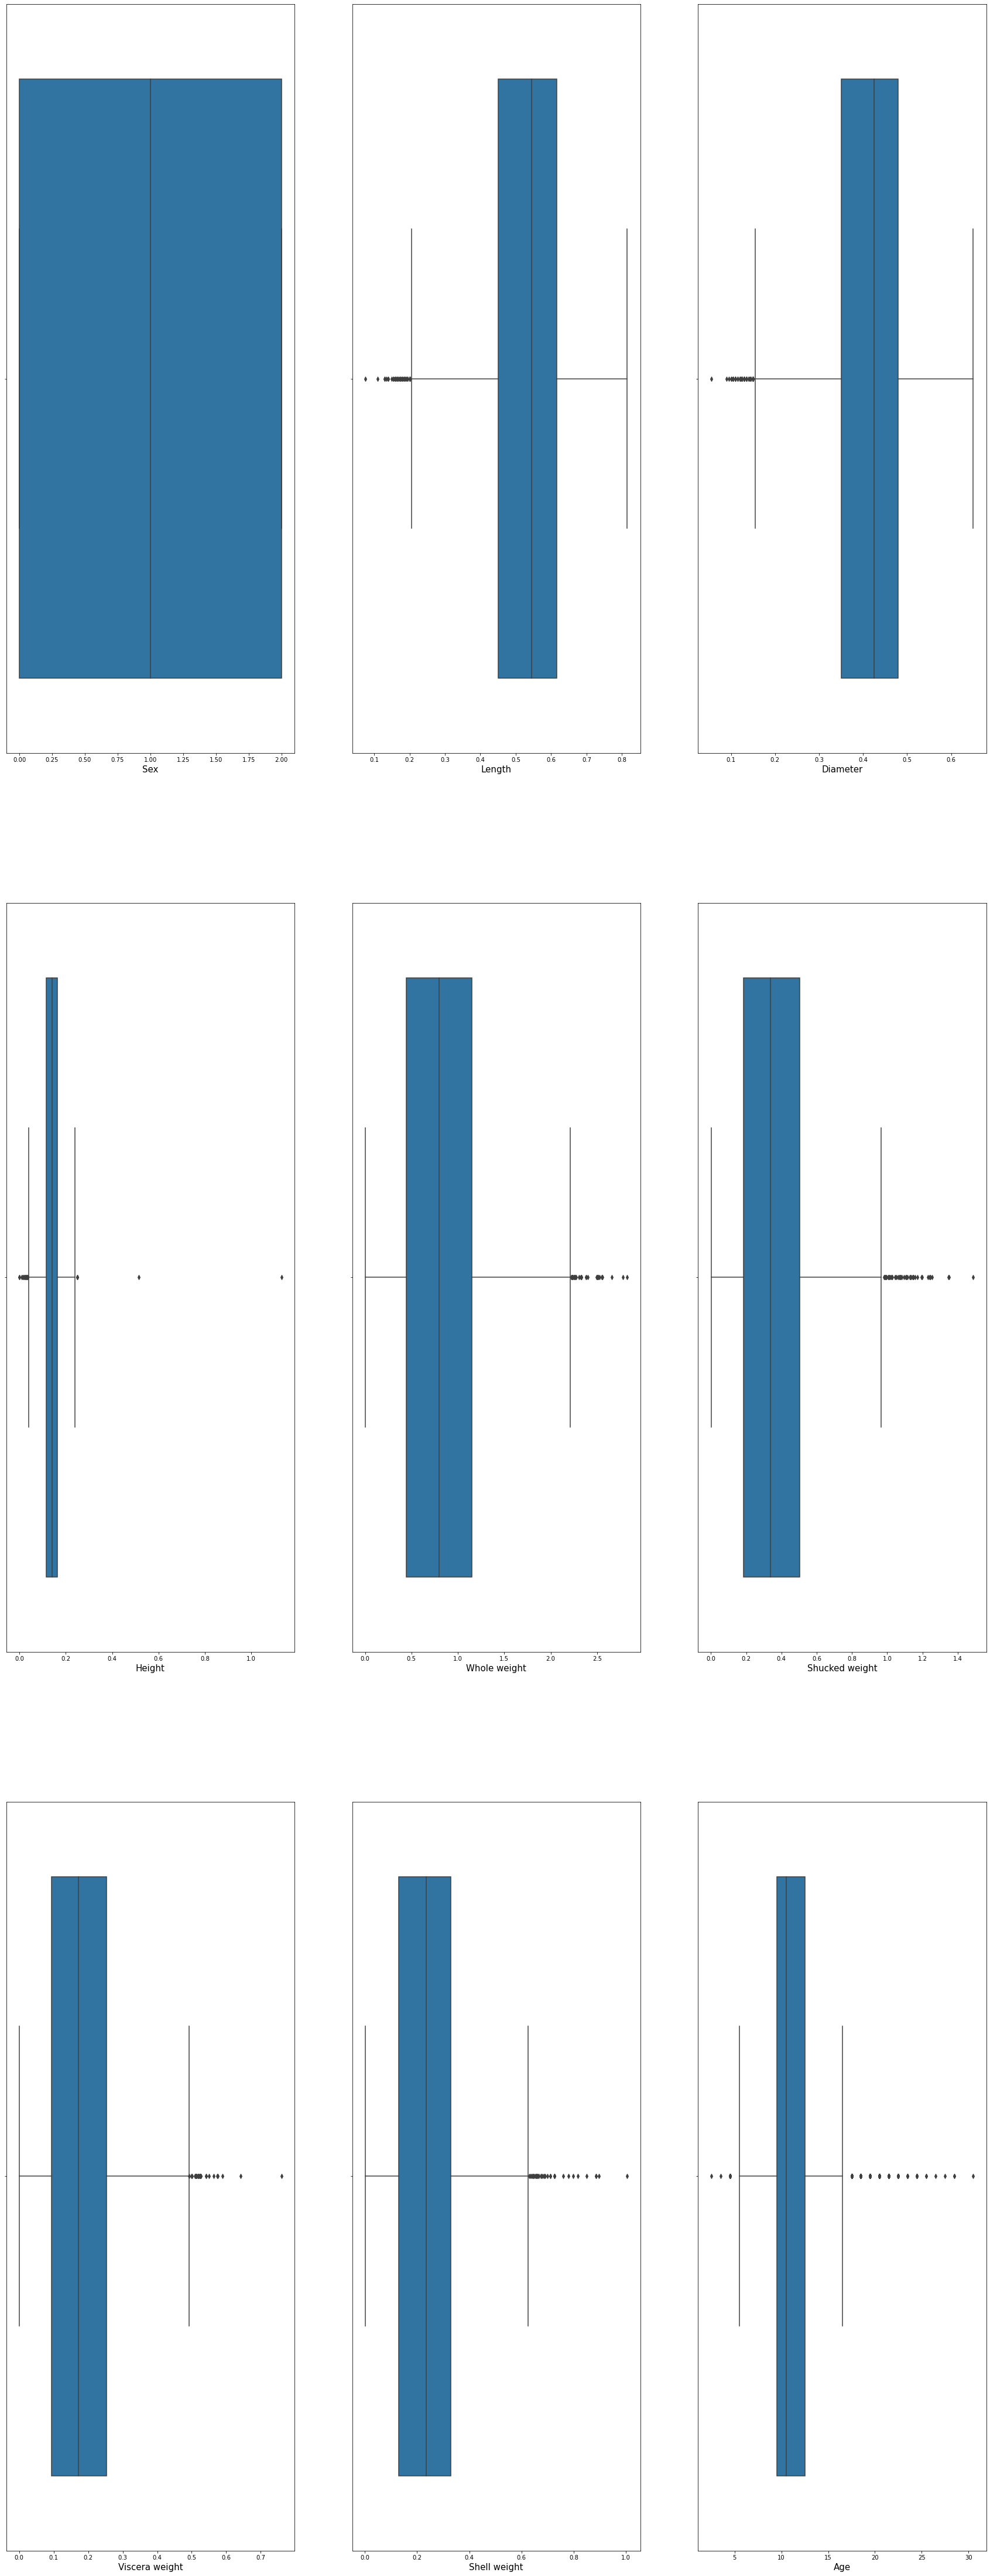

In [20]:
plt.figure(figsize=(30,80))
gr = 1
for column in df:
    if gr<=9:
        ax = plt.subplot(3,3,gr)
        sns.boxplot(df[column],orient='v')
        plt.xlabel(column,fontsize=15)
    gr+=1
plt.show()

#### All the columns have outliers except Sex

#### Lets the skewness of the data

In [21]:
df.skew()

Sex              -0.098155
Length           -0.639873
Diameter         -0.609198
Height            3.128817
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
Age               1.114102
dtype: float64

#### All the columns are highly skewed except sex

### Data Cleaning

#### Dropping sex as the correlation with target variable is negligible

In [22]:
df = df.drop(columns=['Sex'],axis=1)
df.head(3)

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.15,16.5
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.07,8.5
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.21,10.5


#### Removing Outliers

In [23]:
from scipy.stats import zscore
z = np.abs(zscore(df))
print("Old shape : ",z.shape)
print(z)
print("Row numbers : ",np.where(z>3)[0])
print("Column numbers : ",np.where(z>3)[0])
index = np.where(z>3)[0]
df1 = df.drop(df.index[index])
print("New shape : ",df1.shape)

Old shape :  (4177, 8)
[[0.57455813 0.43214879 1.06442415 ... 0.72621157 0.63821689 1.57154357]
 [1.44898585 1.439929   1.18397831 ... 1.20522124 1.21298732 0.91001299]
 [0.05003309 0.12213032 0.10799087 ... 0.35668983 0.20713907 0.28962385]
 ...
 [0.6329849  0.67640943 1.56576738 ... 0.97541324 0.49695471 0.28962385]
 [0.84118198 0.77718745 0.25067161 ... 0.73362741 0.41073914 0.02057072]
 [1.54905203 1.48263359 1.32665906 ... 1.78744868 1.84048058 0.64095986]]
Row numbers :  [   6   72   81   83  129  163  164  165  165  165  166  166  167  168
  170  181  232  236  236  236  237  237  238  238  239  270  275  277
  278  294  310  313  314  334  351  355  358  358  362  375  416  417
  428  431  433  469  478  480  501  526  526  530  572  628  673  674
  675  678  694  696  696  719  719  720  720  744  754  756  811  891
  891  891 1048 1051 1051 1052 1193 1197 1199 1202 1204 1206 1206 1207
 1207 1207 1207 1209 1209 1257 1417 1417 1418 1422 1426 1427 1427 1427
 1428 1429 1429 1528 

##### Removing outliers from diameter column

#### Data loss in percentage

In [24]:
loss = (4177-4027)/4177*100
print("While removing outliers we loss ",loss,"% of data")

While removing outliers we loss  3.5910940866650707 % of data


#### Splitting dataset into x and y 

In [25]:
x = df1.drop("Age",axis=1)
y = df1['Age']

#### Removing Skewness

In [26]:
from sklearn.preprocessing import power_transform
x_new = power_transform(x,method='yeo-johnson')
x_new

array([[-0.68445079, -0.54337947, -1.15893308, ..., -0.54086524,
        -0.68803217, -0.58635376],
       [-1.4117394 , -1.40113174, -1.28040611, ..., -1.31131805,
        -1.33285416, -1.33271691],
       [-0.0462191 ,  0.03716259, -0.12830502, ..., -0.36270513,
        -0.24037305, -0.08021413],
       ...,
       [ 0.65112915,  0.70592133,  1.94363286, ...,  0.90189694,
         1.08965131,  0.66363183],
       [ 0.92606411,  0.8377131 ,  0.28606972, ...,  0.92415296,
         0.87642835,  0.57752029],
       [ 1.9719402 ,  1.85550496,  1.62558351, ...,  2.31446634,
         1.73214622,  1.85675543]])

#### Checking skewness

In [27]:
x_new = pd.DataFrame(x_new,columns=x.columns)
x_new.skew()

Length           -0.082985
Diameter         -0.080956
Height           -0.015962
Whole weight     -0.016797
Shucked weight    0.021815
Viscera weight    0.035902
Shell weight      0.016660
dtype: float64

#### Skewness is removed

#### Visualizing the distribution

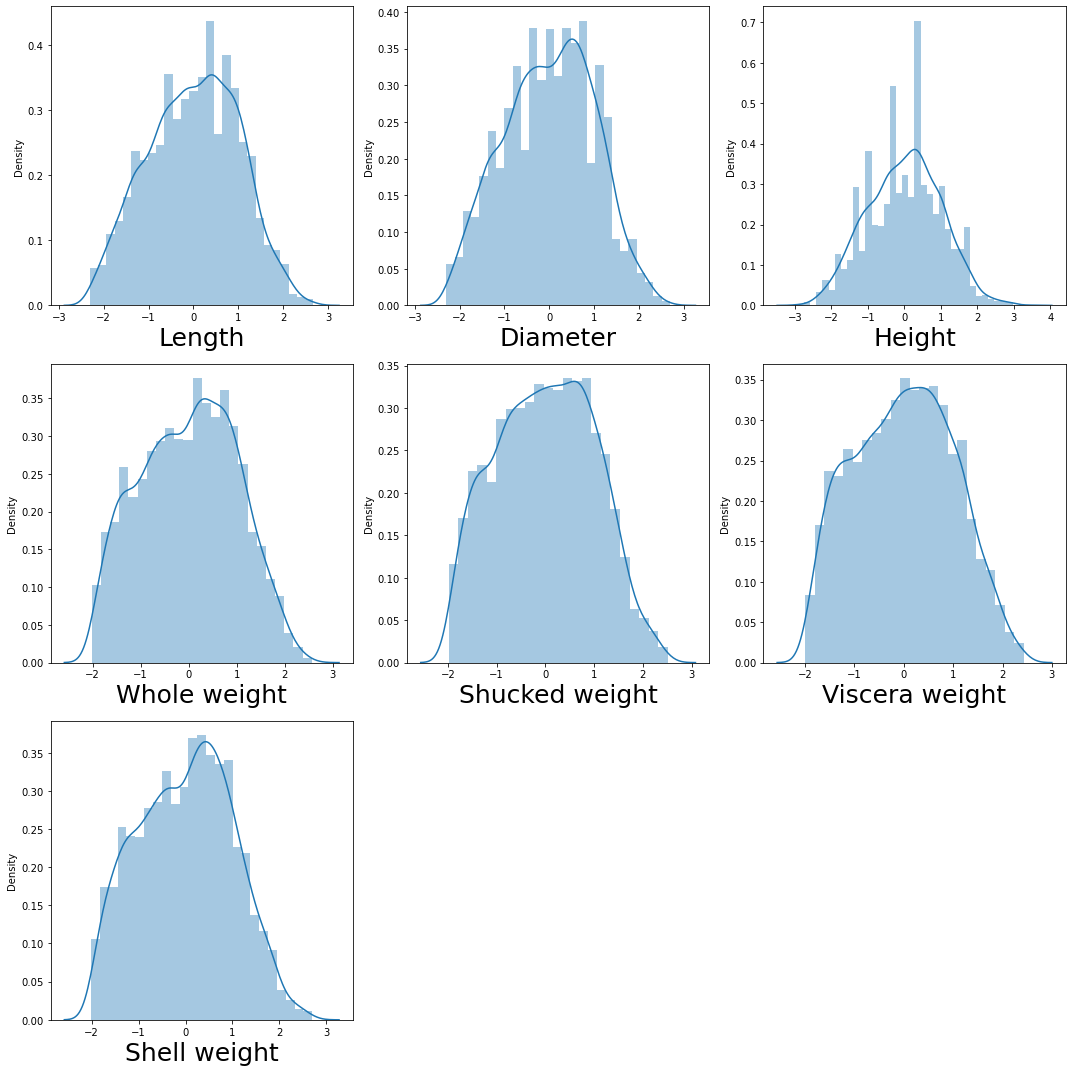

In [28]:
plt.figure(figsize=(15,15),facecolor="white")
plotnumber=1
for column in x_new:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(x_new[column])
        plt.xlabel(column,fontsize=25)
    plotnumber+=1
plt.tight_layout()

#### Scaling X

In [29]:
scale = StandardScaler()
X_scaled = scale.fit_transform(x_new)

#### Checking multicollinearity

In [30]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_scaled,i) for i in range(x_new.shape[1])]
vif["Features"] = x.columns
vif

,vif,Features
0,34.535988,Length
1,33.473119,Diameter
2,6.522491,Height
3,136.044259,Whole weight
4,36.139159,Shucked weight
5,21.919385,Viscera weight
6,30.120461,Shell weight


#### Multicollinearity is higher in whole columns and highest is on column 'Whole weight', lets go ahead without dropping any features

#### Lets split the dataset into train and test

In [31]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.25,random_state = 141)

#### Multicollinearity is high, so performing PCA

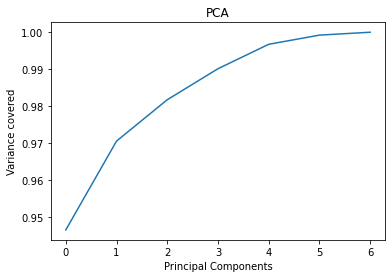

In [32]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit_transform(X_scaled)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Principal Components")
plt.ylabel("Variance covered")
plt.title("PCA")
plt.show()

In [33]:
pca = PCA(n_components=4)
principal = pca.fit_transform(X_scaled)
principal_x = pd.DataFrame(principal,columns=['PC1','PC2',"PC3","PC4"])
principal_x

,PC1,PC2,PC3,PC4
0,-1.796309,0.505776,-0.131923,-0.096731
1,-3.562953,-0.014519,0.052570,-0.033085
2,-0.379243,-0.056395,-0.291806,0.036152
3,-1.508945,-0.185367,0.072440,-0.056520
4,-3.873024,0.130585,0.056565,-0.028404
...,...,...,...,...
4022,1.055368,-0.332013,0.200369,-0.106870
4023,0.935368,0.525198,0.053399,-0.098343
4024,2.554449,-0.970209,0.576430,0.158111
4025,1.944608,0.522104,0.041525,0.027856


In [34]:
x_train,x_test,y_train,y_test = train_test_split(principal_x,y,test_size=0.25,random_state = 141)

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
lr = LinearRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
print("Score in training dataset = ",lr.score(x_train,y_train))
print("Score in testing dataset = ",lr.score(x_test,y_test))
print("Model has been instantiated, trained and predicted")
print("MAE is : ",mean_absolute_error(y_test,y_pred))
print("MSE is :",mean_squared_error(y_test,y_pred))
print("RMSE is :",np.sqrt(mean_squared_error(y_test,y_pred)))

Score in training dataset =  0.4845074177153075
Score in testing dataset =  0.5289404144800937
Model has been instantiated, trained and predicted
MAE is :  1.4795229262004717
MSE is : 3.8231522602070482
RMSE is : 1.9552882805885807


In [36]:
from sklearn.linear_model import Lasso,LassoCV
lassocv = LassoCV(alphas=None,max_iter=1000,normalize=True)
lassocv.fit(x_train,y_train)
alpha = lassocv.alpha_
lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train,y_train)
print("Score after Cross validation by L1 is ",lasso_reg.score(x_test,y_test))

Score after Cross validation by L1 is  0.5289412197824293


In [37]:
from sklearn.linear_model import Ridge,RidgeCV
ridgecv = RidgeCV(alphas=np.arange(0.0001,1,0.01),normalize=True)
ridgecv.fit(x_train,y_train)
alpha = ridgecv.alpha_
ridge_reg = Ridge(alpha)
ridge_reg.fit(x_train,y_train)
print("Score after Cross validation by L2 is ",ridge_reg.score(x_test,y_test))

Score after Cross validation by L2 is  0.5289404174393073


In [38]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
gbr.fit(x_train,y_train)
y_pred_gbr = gbr.predict(x_test)
print("Score in training dataset is ",gbr.score(x_train,y_train))
print("Score in training dataset is ",gbr.score(x_test,y_test))
print("MAE is : ",mean_absolute_error(y_test,y_pred_gbr))
print("MSE is :",mean_squared_error(y_test,y_pred_gbr))
print("RMSE is :",np.sqrt(mean_squared_error(y_test,y_pred_gbr)))

Score in training dataset is  0.6222693455558621
Score in training dataset is  0.5570349133426333
MAE is :  1.3941181707979766
MSE is : 3.5951353593150834
RMSE is : 1.8960842173582595


In [39]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
y_pred_rf = rf.predict(x_test)
print("Score in training dataset is ",rf.score(x_train,y_train))
print("Score in testing dataset is ",rf.score(x_test,y_test))
print("MAE is : ",mean_absolute_error(y_test,y_pred_rf))
print("MSE is :",mean_squared_error(y_test,y_pred_rf))
print("RMSE is :",np.sqrt(mean_squared_error(y_test,y_pred_rf)))

Score in training dataset is  0.9317175168117164
Score in testing dataset is  0.5368460746125316
MAE is :  1.4371698113207547
MSE is : 3.758989374379345
RMSE is : 1.9388113302689731


In [40]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)
y_pred_dt = dt.predict(x_test)
print("Score in training dataset is ",dt.score(x_train,y_train))
print("Score in testing dataset is ",dt.score(x_test,y_test))
print("MAE is : ",mean_absolute_error(y_test,y_pred_dt))
print("MSE is :",mean_squared_error(y_test,y_pred_dt))
print("RMSE is :",np.sqrt(mean_squared_error(y_test,y_pred_dt)))

Score in training dataset is  1.0
Score in testing dataset is  0.11463298344660067
MAE is :  1.9642502482621649
MSE is : 7.185700099304866
RMSE is : 2.680615619462228


In [41]:
from sklearn.model_selection import cross_val_score
cvs = cross_val_score(rf,principal_x,y,cv=5)
print("Cross validation score of Random forest model is : ",cvs.mean())

Cross validation score of Random forest model is :  0.43050171299628276


In [42]:
cvs = cross_val_score(gbr,principal_x,y,cv=5)
print("Cross validation score of GradientDescent Boosting model is : ",cvs.mean())

Cross validation score of GradientDescent Boosting model is :  0.45097560271985754


In [43]:
cvs = cross_val_score(dt,principal_x,y,cv=5)
print("Cross validation score of DecisionTreeRegressor model is : ",cvs.mean())

Cross validation score of DecisionTreeRegressor model is :  -0.13285817386133816


In [44]:
cvs = cross_val_score(lr,principal_x,y,cv=5)
print("Cross validation score of Linear Regression model is : ",cvs.mean())

Cross validation score of Linear Regression model is :  0.4059722663448186


In [45]:
cvs = cross_val_score(ridgecv,principal_x,y,cv=5)
print("Cross validation score of Ridge model is : ",cvs.mean())

Cross validation score of Ridge model is :  0.4059753190780797


In [534]:
models = pd.DataFrame([['Linear Regression','52.89','40.60','12.29'],["GradientBoostRegressor","55.69","45.16","10.53"],["Decision Tree","6.45","-0.13","6.58"],["Random Forest regressor","53.96","42.58","11.38"]],columns = ["Models","R2 Score","Cross Validation Score","Difference"])
models

,Models,R2 Score,Cross Validation Score,Difference
0,Linear Regression,52.89,40.60,12.29
1,GradientBoostRegressor,55.69,45.16,10.53
2,Decision Tree,6.45,-0.13,6.58
3,Random Forest regressor,53.96,42.58,11.38


#### GradientBoostingRegressor seems to be the best model

#### Hyperparameter Tuning

In [46]:
from sklearn.model_selection import RandomizedSearchCV
params = {"learning_rate":np.arange(0.01,0.1),
          "max_depth":np.arange(1,12),
          "min_samples_split":np.arange(1,9),
          "min_samples_leaf":np.arange(1,5),
          "max_features":["log2","sqrt"]
         }
grd = RandomizedSearchCV(gbr,params,cv=5,n_jobs=-1)
grd.fit(x_train,y_train)
grd.best_params_

{'min_samples_split': 3,
 'min_samples_leaf': 3,
 'max_features': 'sqrt',
 'max_depth': 8,
 'learning_rate': 0.01}

In [47]:
from sklearn.metrics import r2_score
model = GradientBoostingRegressor(learning_rate=0.01,max_depth=10,min_samples_split=4,min_samples_leaf=4,max_features='log2')
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
print("R2 Score after hyperparameter tuning is ",r2_score(y_test,y_pred))

R2 Score after hyperparameter tuning is  0.46990067972126914


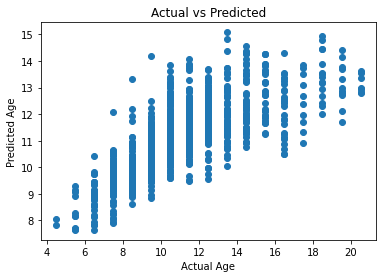

In [48]:
plt.scatter(y_test,y_pred)
plt.xlabel("Actual Age")
plt.ylabel("Predicted Age")
plt.title("Actual vs Predicted")
plt.show()

### Model Training

In [49]:
import pickle
filename = 'abalone.pkl'
pickle.dump(lr,open(filename,'wb'))